<a href="https://colab.research.google.com/github/yuliagrajewska/Computer-Vision-projects/blob/main/hough_transform/hough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#function for reading an image file in black& white
def read_image(image_name):
  input_image = cv2.imread(image_name)
  #print(input_image.shape)
  input_image = cv2.cvtColor(src=input_image, code=cv2.COLOR_BGR2GRAY)
  return input_image

In [ ]:
#reading the imag in color
def read_image2(image_name):
  input_image = cv2.imread(image_name)
  #print(input_image.shape)
  input_image = cv2.cvtColor(src=input_image, code=cv2.COLOR_BGR2RGB)
  return input_image

In [ ]:
def EdgeDetector(image): #canny edge detector
  gauss = cv2.GaussianBlur(image, (5, 5), 1.5)
  canny = cv2.Canny(gauss, 100, 200)
  return canny


In [ ]:
#created the Hough lines accumulator for the image
def hough_accum(img, rho_res=1, theta_res=1):

    X, Y = img.shape
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    diag = np.ceil(np.sqrt(X**2 + Y**2))
    rhos = np.arange(-diag, diag + 1, rho_res)
    H = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_id, x_id = np.nonzero(img) # nonzero pixels

    for i in range(len(x_id)): #going through the non-zero pixels
        x = x_id[i]
        y = y_id[i]

        for j in range(len(thetas)):
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])) + diag)
            H[rho, j] += 1

    return H, rhos, thetas

In [ ]:
def plot_accum(H, plot_title='Hough Accumulator'):
    fig = plt.figure(figsize=(10, 10))
    fig.canvas.set_window_title(plot_title)
    plt.imshow(H, cmap='jet')
    plt.xlabel('Theta '), plt.ylabel('Rho ')
    plt.show()


In [ ]:
#returns indices of rhos and thetas
def GetInd(H, line_nbr):
    H1 = np.copy(H)
    X,Y = H1.shape
    indicies = []
    for i in range(line_nbr):
        idx = np.argmax(H1)

        H1_idx = np.unravel_index(idx, H1.shape)
        indicies.append(H1_idx)
        #suppression
        x, y = H1_idx
        if x in range(1,X-1) and y in range(1,Y-1): #get rid of values in the nbh of the current max
          H1[x-1][y-1] = 0
          H1[x+1][y-1] = 0
          H1[x-1][y+1] = 0
          H1[x+1][y+1] = 0
        H1[x][y] = 0 #set current max to 0 so that it does not repeat
    return indicies, H

In [ ]:
#draw all the detected lines across images
def draw_lines(img, indicies, rhos, thetas):

    for i in range(len(indicies)):
        theta = thetas[indicies[i][1]] #get theta and rho
        rho = rhos[indicies[i][0]]

        #get x,y from theta and rho
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        #create a line using cv.line that will go over the image in the given direction
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #print(x1,x2,y1,y2)


In [ ]:
def find_edges(lined_image,edge_image,og_image):
  #takes the messy line image, edge image, and a clean version of the original image
  #iterate over all pixels of edge image. If edge image is white and line image is green, it's and edge -> the pixel in the clean image turns green
  X,Y = edge_image.shape
  for x in range(X):
    for y in range(Y):
      if edge_image[x][y]==255 and (lined_image[x][y][0] == 0) and (lined_image[x][y][1] == 255) and (lined_image[x][y][2] == 0):
        og_image[x][y] = [0,255,0]
  print('Detected Edges')
  cv2_imshow(og_image)

Original Image


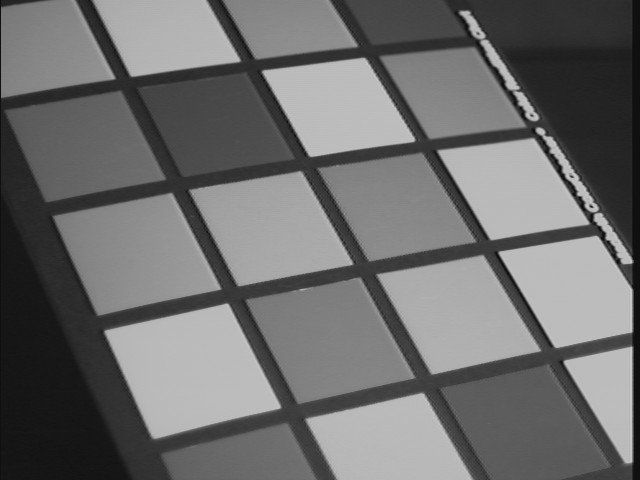

Accumulator


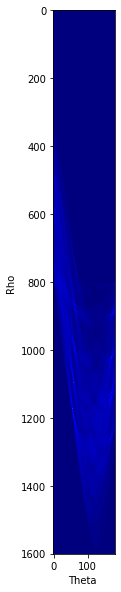

Detected lines


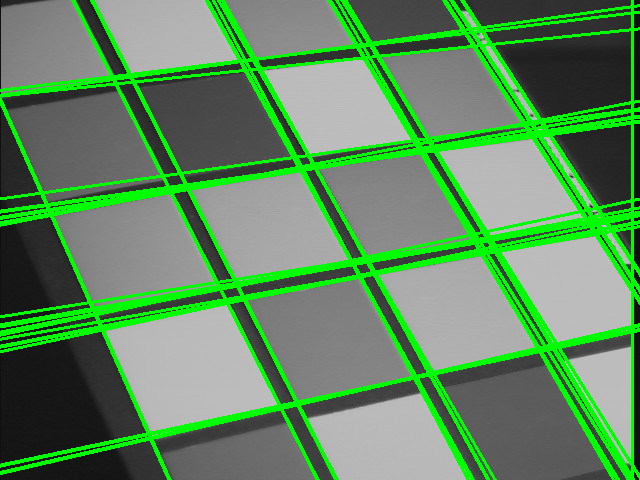

Detected Edges


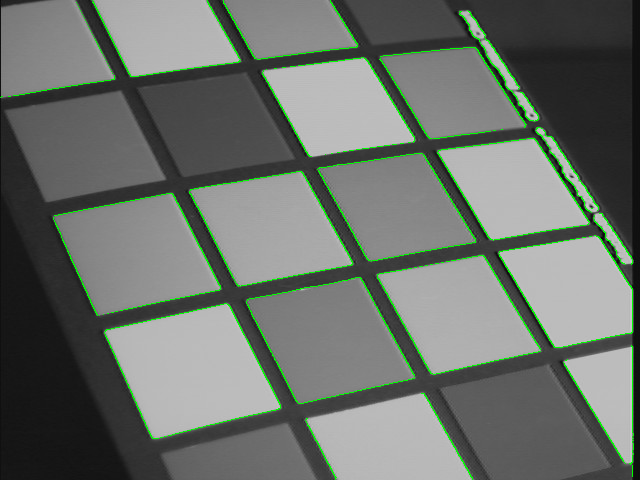

In [ ]:
file = 'img01.jpg'
image_bw = read_image(file)
image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges,rho_res=1, theta_res=1)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)


Original Image


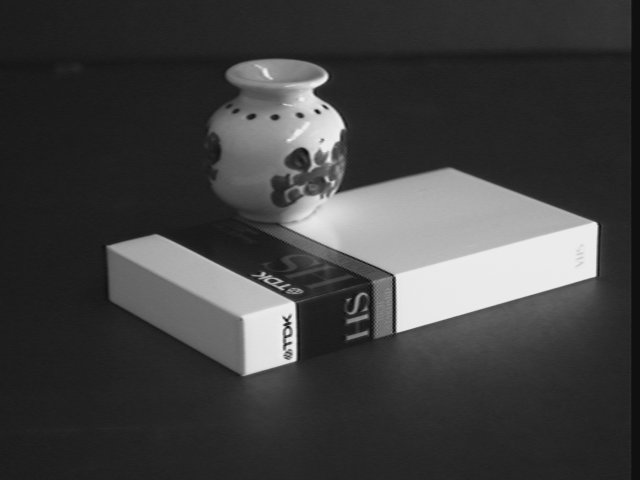

Accumulator


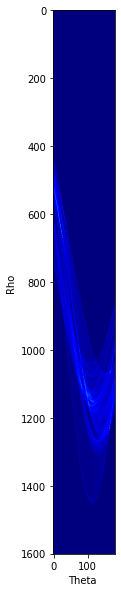

Detected lines


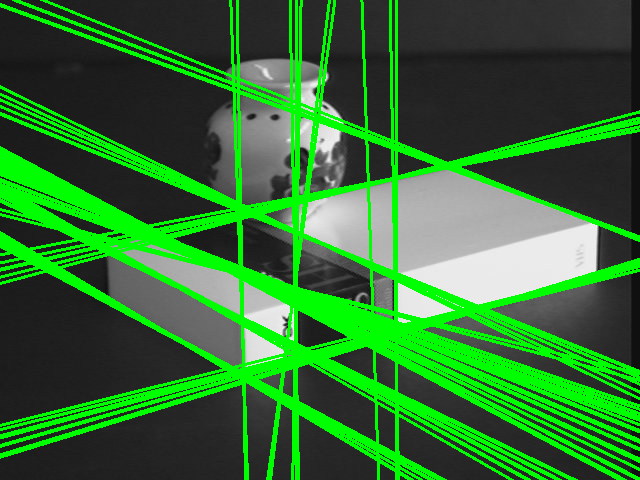

Detected Edges


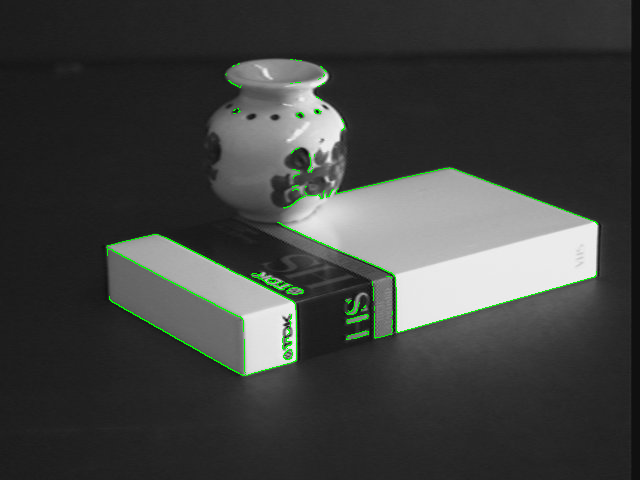

In [ ]:
file = 'img02.jpg'
image_bw = read_image(file)
image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 80)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


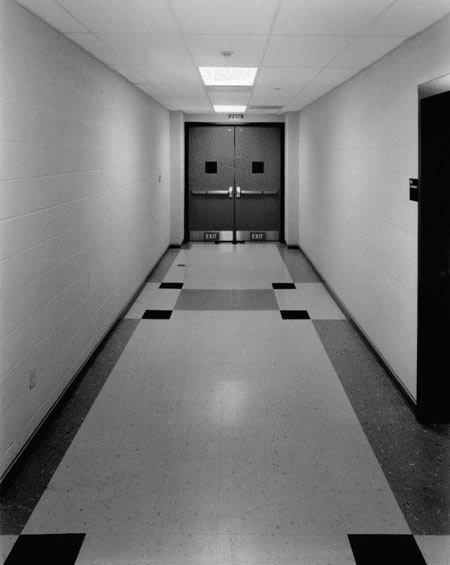

Accumulator


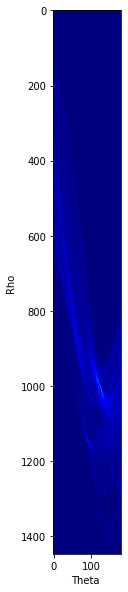

Detected lines


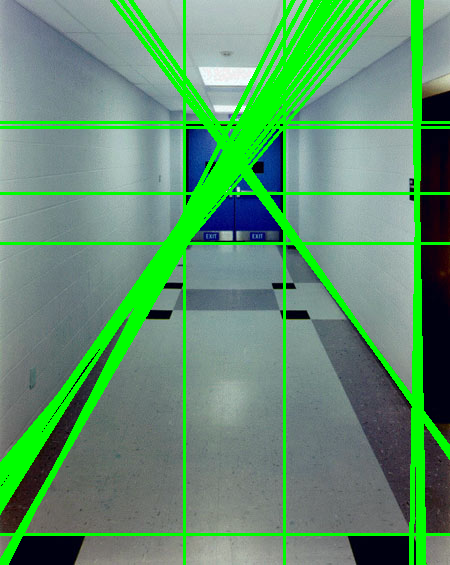

Detected Edges


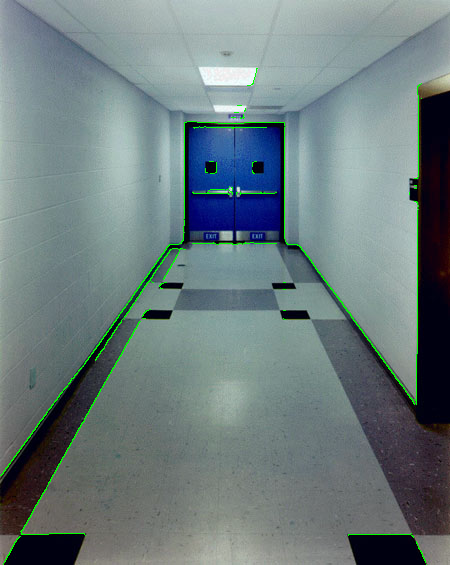

In [ ]:
file = 'img03.jpg'

image_bw = read_image(file)

image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


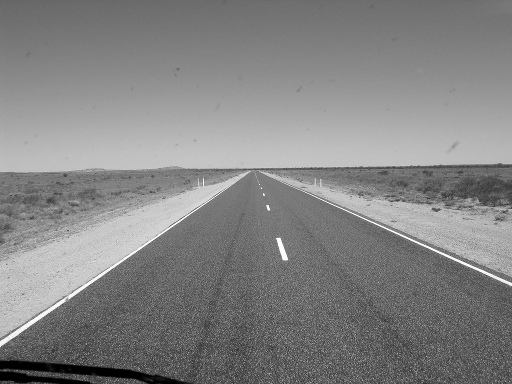

Accumulator


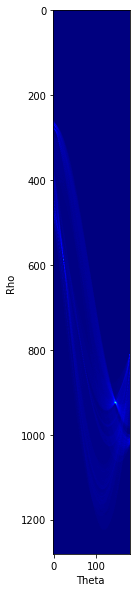

Detected lines


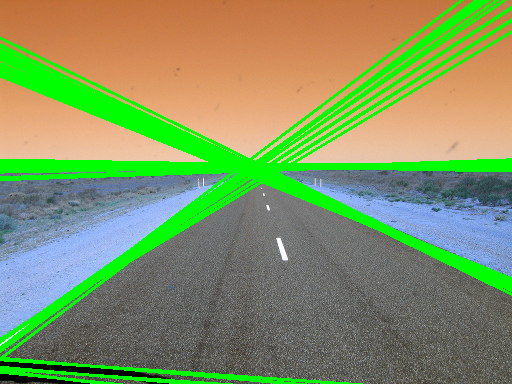

Detected Edges


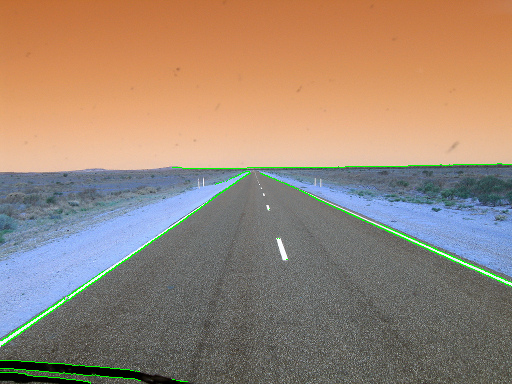

In [ ]:
file = 'img04.jpg'
image_bw = read_image(file)
image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


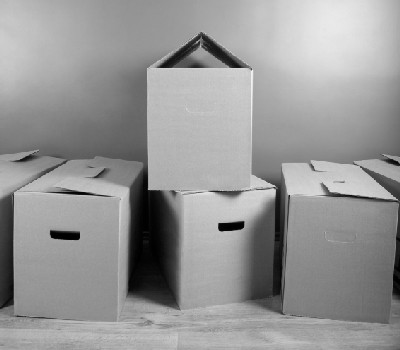

Accumulator


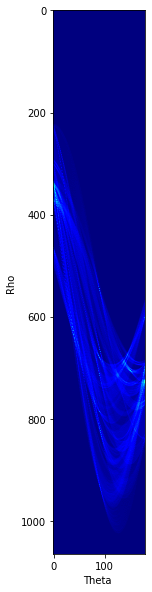

Detected lines


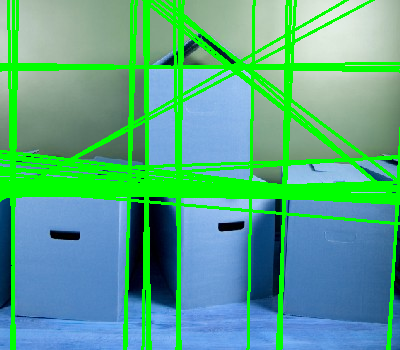

Detected Edges


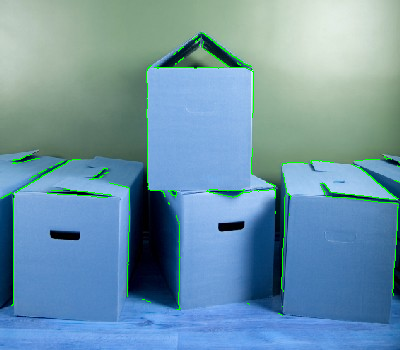

In [ ]:
file = 'img05.jpg'
image_bw = read_image(file)

image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


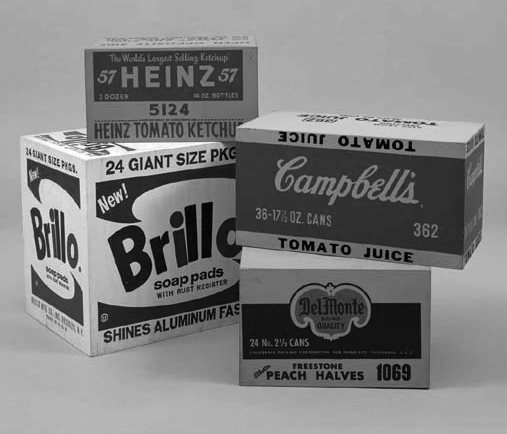

Accumulator


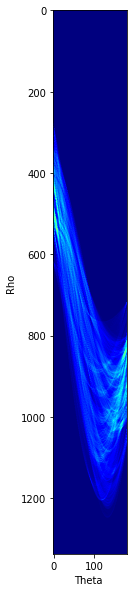

Detected lines


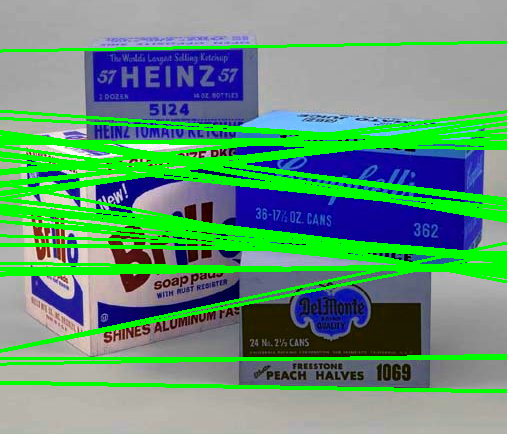

Detected Edges


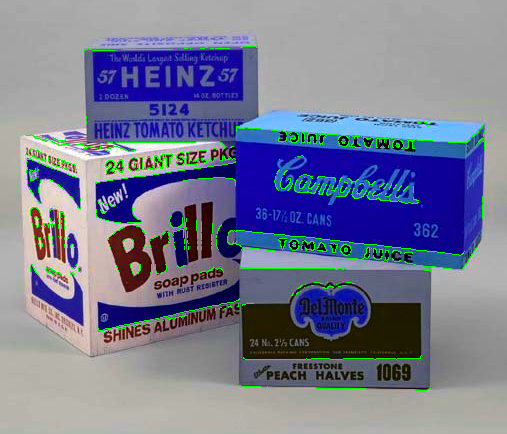

In [ ]:
file = 'img06.jpg'
image_bw = read_image(file)

image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


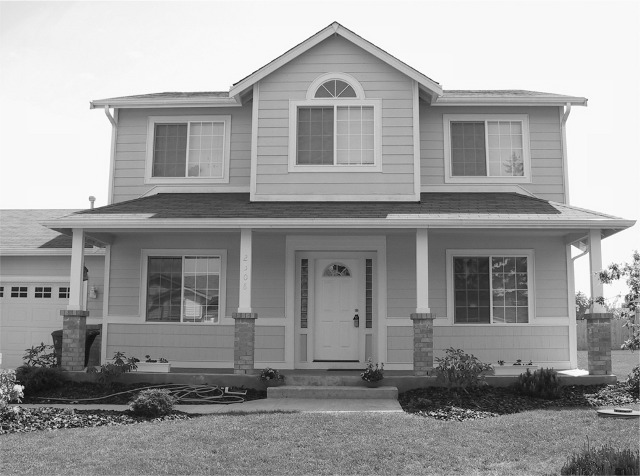

Accumulator


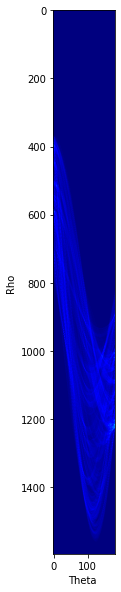

Detected lines


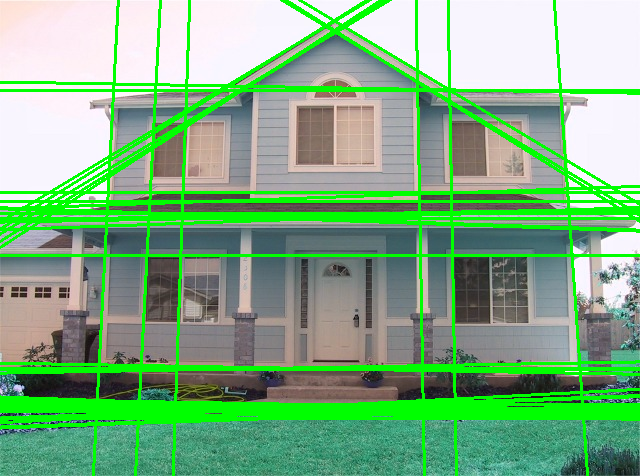

Detected Edges


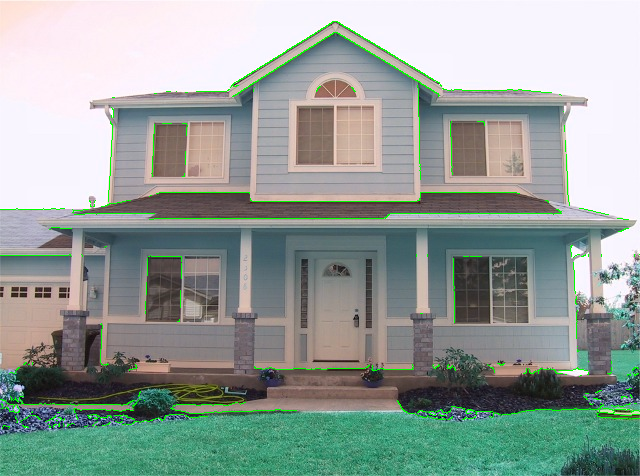

In [ ]:
file = 'img07.jpg'
image_bw = read_image(file)
image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


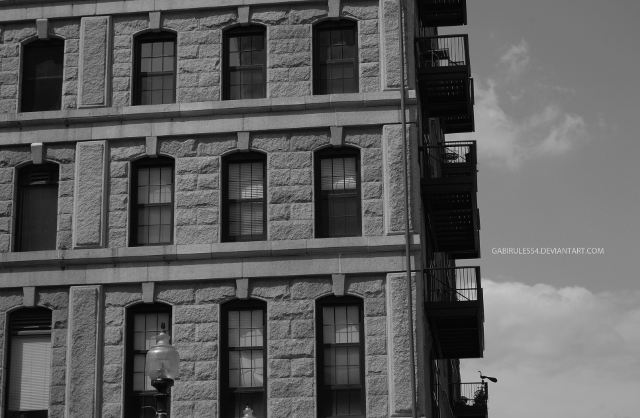

Accumulator


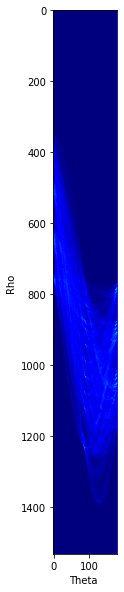

Detected lines


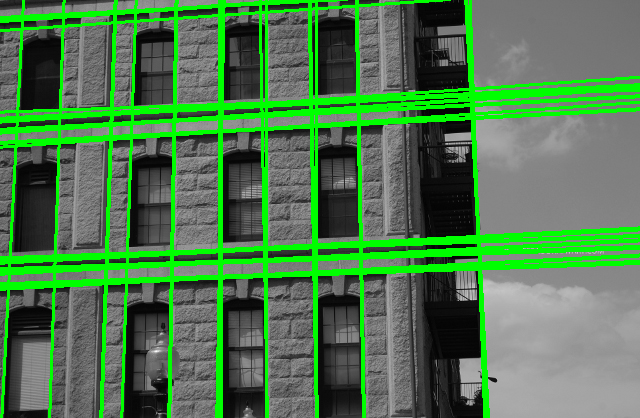

Detected Edges


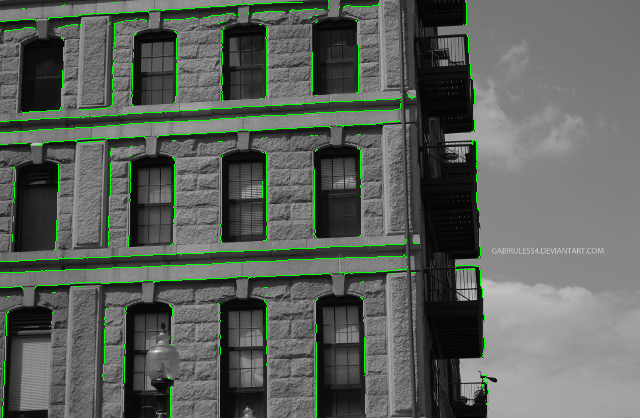

In [ ]:
file = 'img08.jpg'
image_bw = read_image(file)
image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)

Original Image


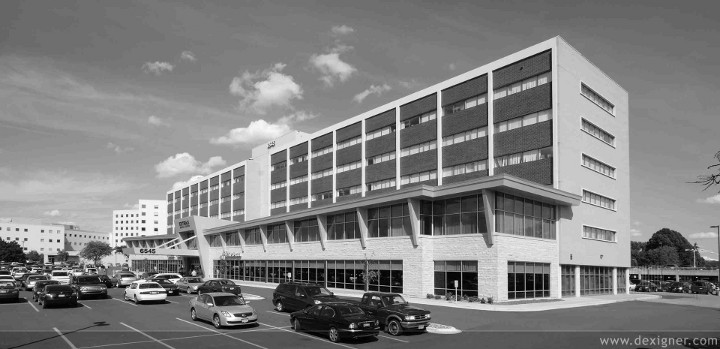

Accumulator


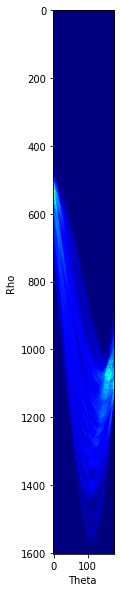

Detected lines


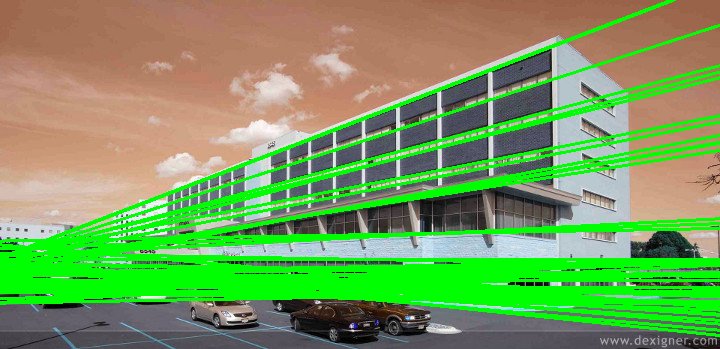

Detected Edges


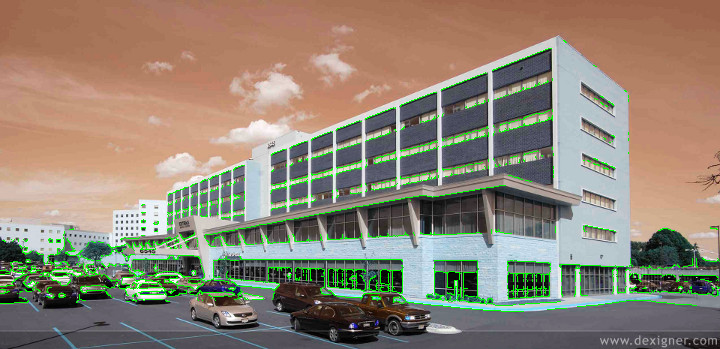

In [ ]:
file = 'img09.jpg'
image_bw = read_image(file)
image_color = read_image2(file)
print('Original Image')
cv2_imshow(image_color)
edges = EdgeDetector(image_bw)
H, rhos, thetas = hough_accum(edges)
indicies, H = GetInd(H, 50)
print('Accumulator')
plot_accum(H)
draw_lines(image_color, indicies, rhos, thetas)
clean = read_image2(file)
print('Detected lines')
cv2_imshow(image_color)
find_edges(image_color,edges,clean)